<a href="https://colab.research.google.com/github/IsraelAlcAlv/ProyectoDS/blob/main/ProyectoDS_ParteI_Alcocer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarjetahabientes Crediticios



## Descripción:
##### La base de datos contiene información sobre distintos atributos de los tarjetahabiendes de cuentas de crédito con el objetivo de identificar aquellos que van a cancelar su cuenta.

##### De aquí, alguna de las variables que se encuentra en la Base de datos son:

* Attrition_Flag: Si la cuenta está cerrada "Atritted Customer" sino "Existing Customer",
* CLIENTNUM: Número de cliente,
* Customer_Age: Edad del cliente,
* Gender: Género del cliente (M= Male, F= Female),
* Education_Level: Nivel educativo del tarjetahabiente titular,
* Marital_Status Estado civil (casado, soltero, etc.),
* Income_Category: Ingresos anuales,
* Card_Category: Tipo de tarjeta (Azul, Plateada, Dorada o Platino),
* Months_on_book: Período de tiempo que ha sido cliente del banco,
* Months_Inactive_12_mon: Número de los últimos 12 meses inactivo,
* Credit_Limit: Limite de crédito en la tarjeta, 

## Introducción

##### Las tarjetas de crédito juegan un papel muy importante en el mundo bancario. Como tarjetahabientes, elegimos las tarjetas que nos ofrescan los mayores beneficios, respaldo y seguridad financiera. 

##### Al hacer uso de las tarjetas de crédito se tiene acceso a beneficios como premios, bonos, descuentos, etc., esto de acuerdo a las transacciones y montos realizados, donde hay usuarios que hacen uso de varias tarjetas y no se quedan con una, ya que toman ventaja de los beneficios, para posteriormente cancelar la cuenta, estos usuarios de les llama Churners (por su nombre en inglés). 

## Objetivo

##### Establecer un modelo predictivo para la detección de churners y sus características, para adiministrar correctamente este tipo de riesgo, y así, poder retener al cliente con acciones o beneficios futuros que ayuden a esto.


## Análisis Exploratorio de Datos (EDA)

In [90]:
#Se inicia con la carga de las librerías que se usarán en esta etapa del proyecto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [91]:
#Carga de la base de datos

Tarjetas_Df = pd.read_csv("/content/Credit Card.csv")
Tarjetas_Df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [92]:
Tarjetas_Df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [93]:
print(Tarjetas_Df.shape)

(10127, 23)


##### A partir de aquí, se han conocido las caracteríticas de la base de datos, la cual cuenta con más de 10,000 registros y 23 campos.

In [94]:
Tarjetas_Df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

##### Note que, las dos últimas columnas indican clasificadores naive bayes prediction scores, por lo tanto, se eliminarán estas columnas.

In [95]:
cols = np.arange(21,Tarjetas_Df.shape[1])
Tarjetas_1= Tarjetas_Df.drop(Tarjetas_Df.columns[cols], axis=1)
Tarjetas_1.describe()

display(Tarjetas_1.head(5))

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [96]:
Tarjetas_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

##### De acuerdo a esto, se analizará la proporción de personas que actualmente tienen una cuenta contra aquellas que ya resindieron de ella, y esto se hará con ayuda de la variable objetivo "Attrition_Flag" la cual es una variable dicotómica, misma que es 1 si la cuenta está cerrada y 0 en caso contrario.


In [97]:
churn = Tarjetas_1['Attrition_Flag'].value_counts()

churn

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

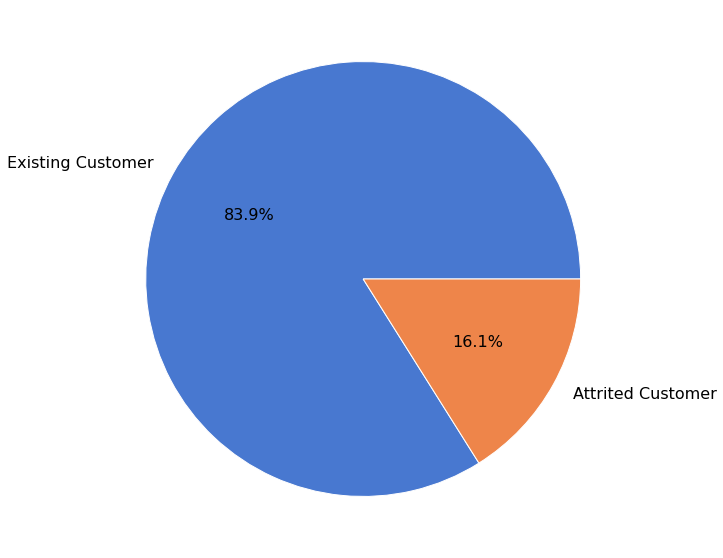

In [98]:
color = sns.color_palette("muted")
piechart = plt.pie(x = churn, colors = color,labels = churn.keys(), autopct = "%.1f%%", 
                   textprops = {'color': 'Black','fontsize':16},)


##### Siguiendo la gráfica de pastel, en nuestra base de datos, la proporción de clientes con cuentas cerradas es del 16.1%.

##### A continuación, se modelarán algunas variables númericas para análisis de frecuencias y comportamientos.

In [99]:
Tarjetas_Freq = pd.concat([Tarjetas_1['Attrition_Flag'],Tarjetas_1['Customer_Age'],Tarjetas_1['Months_Inactive_12_mon'],
                    Tarjetas_1['Credit_Limit'],Tarjetas_1['Total_Trans_Amt'],Tarjetas_1['Total_Trans_Ct']],axis=1)

Tarjetas_Freq.head(5)

,Attrition_Flag,Customer_Age,Months_Inactive_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
0,Existing Customer,45,1,12691.0,1144,42
1,Existing Customer,49,1,8256.0,1291,33
2,Existing Customer,51,1,3418.0,1887,20
3,Existing Customer,40,4,3313.0,1171,20
4,Existing Customer,40,1,4716.0,816,28


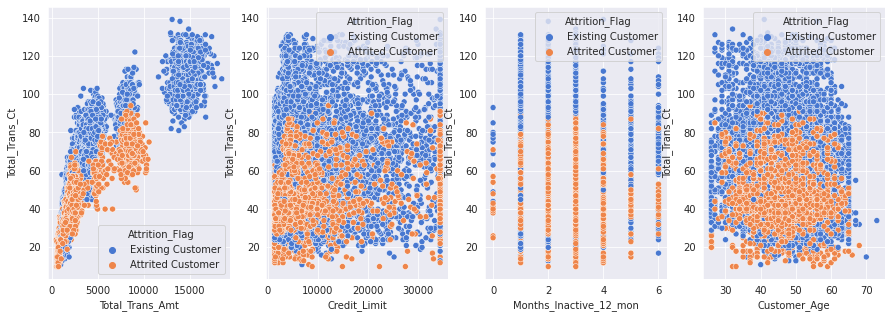

In [100]:
fig , ax = plt.subplots(ncols = 4, figsize= (15,5))

sns.scatterplot(data = Tarjetas_Freq, x = 'Total_Trans_Amt' , y = 'Total_Trans_Ct', palette= "muted", hue = 'Attrition_Flag', ax = ax[0])

sns.scatterplot(data = Tarjetas_Freq, x = 'Credit_Limit' , y = 'Total_Trans_Ct', palette= "muted", hue = 'Attrition_Flag', ax = ax[1])

sns.scatterplot(data = Tarjetas_Freq, x = 'Months_Inactive_12_mon' , y = 'Total_Trans_Ct',palette= "muted", hue = 'Attrition_Flag', ax = ax[2])

freqplot = sns.scatterplot(data = Tarjetas_Freq, x = 'Customer_Age' , y = 'Total_Trans_Ct', palette= "muted", hue = 'Attrition_Flag', ax = ax[3])

##### Algunas observaciones del compartamiento de estos datos son:

1.   Clientes con mayor monto en sus transacciones y mayor limite credicio permanecen por más tiempo.
2.   Respecto a la variable edad ("Customer Age"), se nota que cualquier persona sin importar la edad puede cancelar.
3.   Clientes que cancelaron la cuenta usaron su tarjeta hasta 85-90 veces en 5 meses.




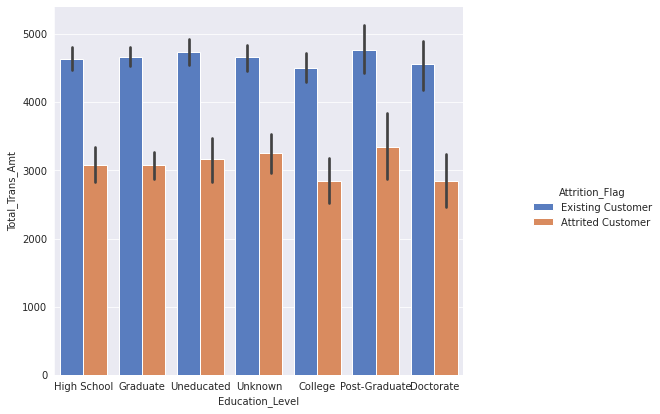

In [101]:
sns.catplot(data = Tarjetas_1, kind= "bar", x = 'Education_Level' , y = 'Total_Trans_Amt', palette= "muted", hue = 'Attrition_Flag').figure.set_size_inches(10,6)

##### De acuerdo a este gráfico, se da a conocer que sin imporatar el nivel educativo de los clientes, aquellos que ya resindieron de la cuenta realizan transacciones menores a 3,500.

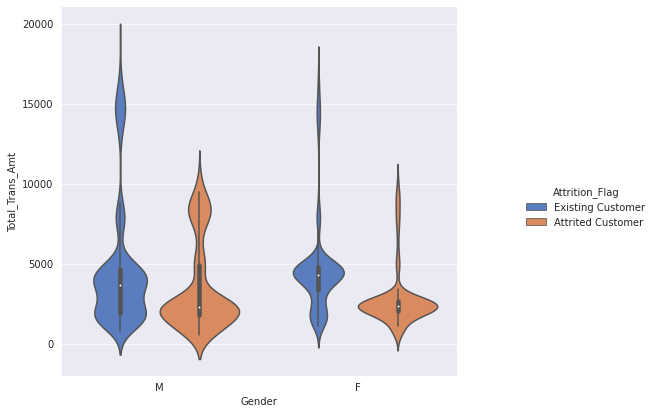

In [102]:
sns.catplot(data = Tarjetas_1, kind= "violin", x = 'Gender' , y = 'Total_Trans_Amt', palette= "muted" , hue = 'Attrition_Flag').figure.set_size_inches(10,6)

##### Note que, la mayor cantidad de clientes que resindieron el monto de transacciones máximo oscila entre 4000-5000. Además, el sexo masculino realiza transacciones con mayor monto que el sexo femenino, este compartamiento se ve para ambos tipos de clientes.

In [103]:
Tarjetas_cust = pd.concat([Tarjetas_1[['Customer_Age','Gender','Education_Level','Marital_Status','Income_Category','Attrition_Flag']]],axis=1)
Tarjetas_cust.head(5)

,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Attrition_Flag
0,45,M,High School,Married,$60K - $80K,Existing Customer
1,49,F,Graduate,Single,Less than $40K,Existing Customer
2,51,M,Graduate,Married,$80K - $120K,Existing Customer
3,40,F,High School,Unknown,Less than $40K,Existing Customer
4,40,M,Uneducated,Married,$60K - $80K,Existing Customer


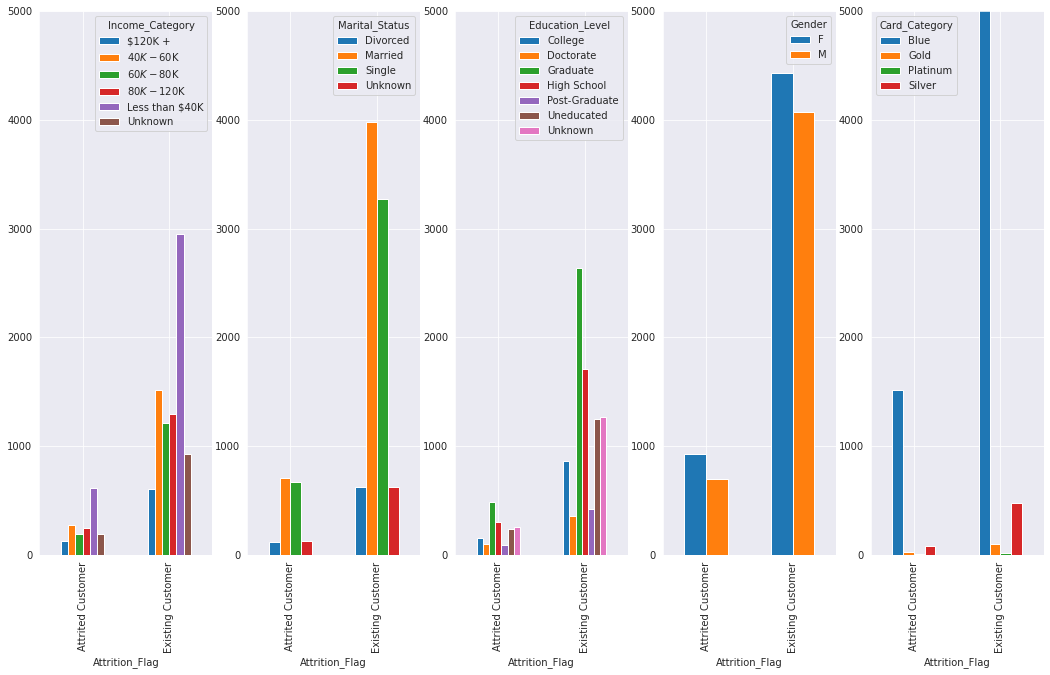

In [104]:
fig , ( ax, ax2, ax3, ax4, ax5 ) = plt.subplots(ncols = 5, 
                                          figsize = (18,10))

## Bar Charts for categorical features

pd.crosstab(Tarjetas_1['Attrition_Flag'],Tarjetas_1['Income_Category']).plot(kind = 'bar',ax = ax, ylim = [0,5000])

pd.crosstab(Tarjetas_1['Attrition_Flag'],Tarjetas_1['Marital_Status']).plot(kind = 'bar', ax = ax2, ylim = [0,5000])

pd.crosstab(Tarjetas_1['Attrition_Flag'],Tarjetas_1['Education_Level']).plot(kind = 'bar', ax = ax3, ylim = [0,5000])

pd.crosstab(Tarjetas_1['Attrition_Flag'],Tarjetas_1['Gender']).plot(kind = 'bar', ax = ax4, ylim = [0,5000])

pd.crosstab(Tarjetas_1['Attrition_Flag'],Tarjetas_1['Card_Category']).plot(kind = 'bar', ax = ax5, ylim = [0,5000])


##### Analizando más los datos demograficos, se tiene que, factores como ser de sexo femenino, estar graduada y casada contribuyen a obtener un mayor score crediticio. Seguido de personas del sexo femmenino, solteras y con ingresos anuales de entre 40k-60k.

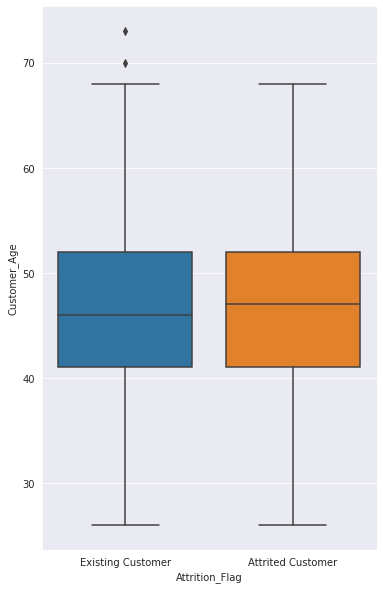

In [105]:
boxplot = sns.boxplot(data = Tarjetas_cust, x = 'Attrition_Flag', y = 'Customer_Age').figure.set_size_inches(6,10)

##### Por último, en el gráfico boxplot, se puede ver que hay una distribución equitativa entre clientes y no clientes. 

A partir de aquí, podemos generar algunas conclusiones para saber que variables nos podrían ser útiles para nuestro modelo objetivo, entre ellas se encuntran:

* ** Attrition_Flag:** Está es nuestra variable objetivo, o bien, la que queremos predecir, hemos visto que la proporción de "Atritted Customer" es mucho menor a su resultado contrario, por lo tanto, los resultados podrían tener grados de confianza menores (hasta la obtención de una mayor cantidad de datos). Particularmente, debemos realizar una transformación a las categorías de esta variable donde: 1 = Atritted Customer y 0 = Existing Customer. 

* Customer_Age: Edad del cliente,
* Gender: Género del cliente (M= Male, F= Female),
* Education_Level: Nivel educativo del tarjetahabiente titular,
* Marital_Status Estado civil (casado, soltero, etc.),
* Income_Category: Ingresos anuales,
* Card_Category: Tipo de tarjeta (Azul, Plateada, Dorada o Platino),
* Credit_Limit: Limite de crédito en la tarjeta, 
* Total_Trans_Amt: Monto total de transacción en los últimos 12 meses,
* Total_Trans_Ct: Total de transacciones realizadas los últimos 12 meses.

Variables que pueden analizar con mayor profundidad:
* Months_on_book: Período de tiempo que ha sido cliente del banco,
* Months_Inactive_12_mon: Número de los últimos 12 meses inactivo,